### Download training dataset

In [1]:
from torchvision.datasets import MNIST

dataset = MNIST(root='data/', download=True)

In [2]:
len(dataset)

60000

### Download test dataset

In [3]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

View sample in training dataset

In [4]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Display some of the dataset

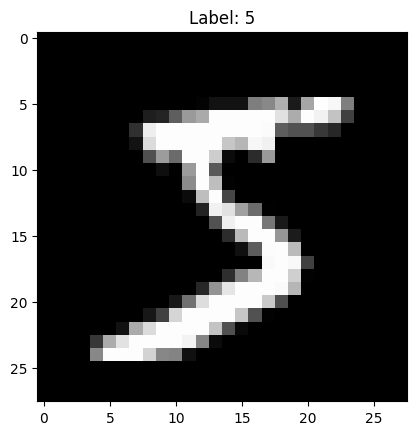

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

image, label = dataset[0]
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

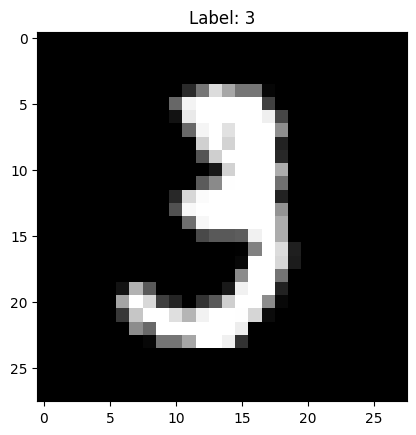

In [6]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

### Convert image into tensor using `transforms` function

In [7]:
import torchvision.transforms as transforms

dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [8]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


## Set training, validation and test set

In [9]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds), len(test_dataset)

(50000, 10000, 10000)

Create data loader with batch

In [10]:
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

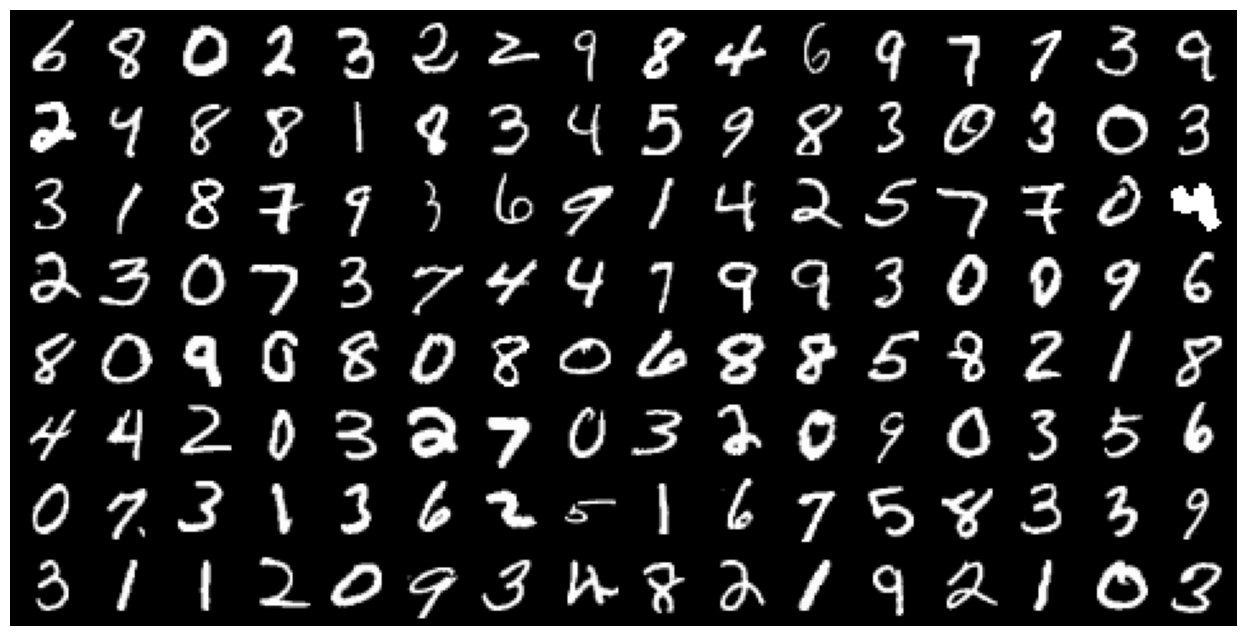

In [11]:
from torchvision.utils import make_grid

for images, labels in train_loader:
    plt.figure(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    plt.show()
    break

# Hiddent layers, Activation function and non-linearity

In [12]:
input_size = train_loader.dataset[0][0].reshape(-1).shape[0]
hidden_size = 32

In [13]:
from torch import nn

layer1 = nn.Linear(input_size, hidden_size)
layer1

Linear(in_features=784, out_features=32, bias=True)

In [14]:
layer1_output = layer1(images.reshape(-1, input_size))
print(layer1_output.shape)

torch.Size([128, 32])


In [15]:
layer1_output

tensor([[-0.0732, -0.2380, -0.1920,  ...,  0.2492,  0.0124,  0.1758],
        [-0.2104,  0.1749,  0.2834,  ...,  0.0297,  0.1288,  0.1358],
        [ 0.0158, -0.2156,  0.2769,  ...,  0.2193,  0.0949,  0.4920],
        ...,
        [-0.2964, -0.0218, -0.0390,  ...,  0.1524, -0.1516,  0.3097],
        [-0.1227, -0.0973,  0.0938,  ..., -0.0795, -0.1018,  0.1898],
        [-0.2313,  0.2019,  0.2105,  ..., -0.0480,  0.1011,  0.2570]],
       grad_fn=<AddmmBackward0>)

Manual calculation of nn.Linear layer

In [16]:
layer1_output_direct = images.reshape(-1, input_size) @ layer1.weight.t() + layer1.bias
layer1_output_direct.shape

torch.Size([128, 32])

In [17]:
layer1_output_direct

tensor([[-0.0732, -0.2380, -0.1920,  ...,  0.2492,  0.0124,  0.1758],
        [-0.2104,  0.1749,  0.2834,  ...,  0.0297,  0.1288,  0.1358],
        [ 0.0158, -0.2156,  0.2769,  ...,  0.2193,  0.0949,  0.4920],
        ...,
        [-0.2964, -0.0218, -0.0390,  ...,  0.1524, -0.1516,  0.3097],
        [-0.1227, -0.0973,  0.0938,  ..., -0.0795, -0.1018,  0.1898],
        [-0.2313,  0.2019,  0.2105,  ..., -0.0480,  0.1011,  0.2570]],
       grad_fn=<AddBackward0>)

In [18]:
import torch

torch.allclose(layer1_output, layer1_output_direct, 1e-3)

True

ReLU activation function

In [19]:
from torch.nn import functional as F

F.relu(torch.tensor([[1, -1, 0], [-0.1, 0.2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [20]:
relu_output = F.relu(layer1_output)
print(relu_output.shape)
print('Min value in the layer1_output:', torch.min(layer1_output).item())
print('Min value in the relu_output:', torch.min(relu_output).item())

torch.Size([128, 32])
Min value in the layer1_output: -0.6308582425117493
Min value in the relu_output: 0.0


In [21]:
output_size =  10
layer2 = nn.Linear(hidden_size, output_size)

In [22]:
layer2_output = layer2(relu_output)
print(layer2_output.shape)

torch.Size([128, 10])


Apply loss function

In [23]:
F.cross_entropy(layer2_output, labels)

tensor(2.3497, grad_fn=<NllLossBackward0>)

Manual computation for layer1 and layer2

In [24]:
outputs = (F.relu(images.reshape(-1, input_size) @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias)
outputs

tensor([[-1.6277e-01,  4.6559e-02,  1.9632e-04,  ...,  1.5759e-01,
         -2.4582e-01, -3.1900e-01],
        [-1.1934e-01, -6.1471e-02,  4.7336e-02,  ...,  1.1812e-01,
         -2.9182e-01, -3.2352e-01],
        [-2.5411e-01, -9.3511e-02,  1.8817e-02,  ...,  1.5314e-01,
         -2.9757e-01, -3.7070e-01],
        ...,
        [-5.4333e-02,  6.7322e-02, -3.3932e-02,  ...,  1.7794e-01,
         -2.2842e-01, -1.8640e-01],
        [-2.6577e-01, -5.8717e-02, -6.3914e-02,  ...,  2.8549e-01,
         -3.4455e-01, -2.7774e-01],
        [-2.0421e-02, -8.5484e-02,  1.1641e-02,  ...,  9.4078e-02,
         -2.2829e-01, -2.8230e-01]], grad_fn=<AddBackward0>)

In [25]:
torch.allclose(outputs, layer2_output, 1e-3)

True

# Modeling

In [26]:
def accuracy(y_pred, y_true):
    _, preds = torch.max(y_pred, dim=1)
    return torch.tensor(torch.sum(preds == y_true).item() / len(preds))

class MNISTModel(nn.Module):
    def __init__(self, in_size, hidden_size, output_size, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.linear1 = nn.Linear(in_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MNISTModel(input_size, hidden_size, output_size)

In [28]:
for layer in model.parameters():
    print(layer.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [29]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape:', outputs.shape)
print('Sample outputs:\n', outputs[:2].data)

Loss: 2.3072474002838135
outputs.shape: torch.Size([128, 10])
Sample outputs:
 tensor([[ 0.1636, -0.1498,  0.0008, -0.0832, -0.0139,  0.1948, -0.1057, -0.0367,
         -0.0236,  0.1351],
        [ 0.1331, -0.2224,  0.0733, -0.0741, -0.0247,  0.2163, -0.2568, -0.0153,
          0.1637,  0.1512]])


### Using GPU

In [30]:
torch.cuda.is_available()

False

In [32]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()
device

device(type='cpu')

In [33]:
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [34]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cpu


In [35]:
class DeviceDataLoader:
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [36]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

### Training

In [37]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [38]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3210556507110596, 'val_acc': 0.06764240562915802}]

In [39]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2242, val_acc: 0.9364
Epoch [1], val_loss: 0.1881, val_acc: 0.9448
Epoch [2], val_loss: 0.2001, val_acc: 0.9407
Epoch [3], val_loss: 0.1888, val_acc: 0.9449
Epoch [4], val_loss: 0.1572, val_acc: 0.9554


In [40]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1291, val_acc: 0.9642
Epoch [1], val_loss: 0.1274, val_acc: 0.9642
Epoch [2], val_loss: 0.1260, val_acc: 0.9637
Epoch [3], val_loss: 0.1250, val_acc: 0.9635
Epoch [4], val_loss: 0.1249, val_acc: 0.9653


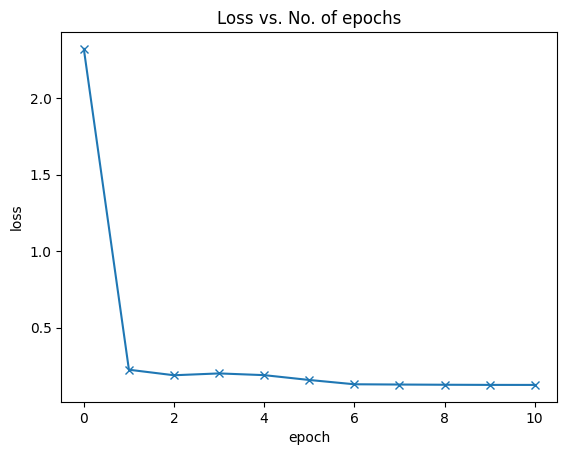

In [41]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')
plt.show()